# DS1 Final Presentation

## Gloria Li

# Problem Statement

### Does net-metered generation impact grid reliability?

<img src="https://cdn.vox-cdn.com/thumbor/7X2ABl-kVv_q9thIcdH1ie0oX7s=/600x0/filters:no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/13591928/SCENE3.gif" width="600" align="left">


<div style="position: relative; left: 15; width: 100px; text-align:left;">
 Vox, 2019
  </div>

# Background

### Distributed Energy Resources and Grid Reliability

Distributed energy sources: rooftop panels, electric vehicles, home batteries, and smart meters become more common

**Positives**:
1. Reduced Emissions
2. Optimized Distribution Operations
3. Grid Flexibility (e.g. Demand Response Capabilities)
3. Customer Choice
4. Resilience

**Negatives**: 
1. Bi-directional Power Flows
2. Intermittent Power (variable power generation)
3. Cross-subsidization
4. Lost Revenue Potential -> reduces utility's need to invest in more infrastructure, which is how they earn money


Utility Death Spiral?

## Outcomes

- System Average Interruption Duration Index **(SAIDI)**

- System Average Interruption Frequency Index **(SAIFI)**

- Customer Average Interruption Duration Index **(CAIDI)**

### I used data from the Energy Information Admin's Form 861 with annual responses from all utilities and electric providers in the U.S. on a range of metrics, including customers served, capacity and sales measures for net metered generation, energy efficiency and demand response programs, and also system reliability. THere were a little over 1000 utilities that reported for the 2019 year, and the earliest reliability metrics were from 2013, so I theoretically had 2013-2019 to work with. 

#### Reliability Triangle
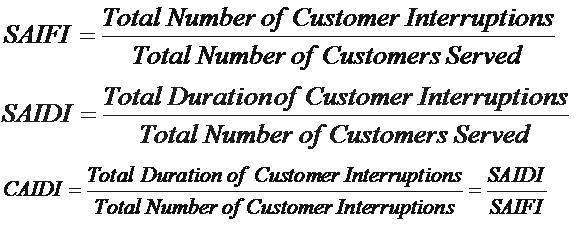

## I use them without Major Event Days (hurricanes, winter storms)

## Features (Original) 


**Predictors**

- Net-metered distributed generation (wind, solar, other) – *Megawatthours sold back*

- Energy efficiency programs – *Megawatthours sold back*

- Demand response programs – *Megawatthours sold back*


**Controls**
- State, Utility Type, NERC Region, BA Code

- Utility sales and customer totals – *Megawatthours sold*

- Circuits and voltage optimization – *Number of circuits*

### This data was distributed over annual zipped spreadsheets from EIA so Data cleaning and manipulation took a fair amount of time. I merged together spreadsheets for 2019 and started there to avoid overcomplicating the problem at the outset. This yielded about 770 observations total, after the cleaning.

### Once I had the features, one big question I had was how to alter the variables for my use as they are reported differently, some in megawatts, some in megawatthours and some in terms of enrolled customers. 

### Some of them were also categorical, which I turned numeric since I was dealing with a regression problem.

# Methods: Feature Engineering



# Feature Engineering Part I: Missing Values

*To impute or not to impute?*


### Method 1

Impute with zeroes.

### Method 2

Drop the missing values.

### Outcome

I chose **SAIDI** as my outcome variable because it had the most non-missing entries.

## There were a lot of missing values in my data. I quickly realized dealing with missing values required domain knowledge.
At first I assumed a nonresponse just meant there was nothing to report for my features of interest, such as net metered generation and energy efficiency program. I couldn't assume this for my outcome variables, however, because a nonrseponse does not mean zero, or every nonresponse would become a perfect reliability score which seemed unlikely. Additionally, since these metrics are usually reported with major event days included, it was likely that some utilities just didn't do that extra step of calculation. I did not consider mean or KNN imputation because I'm still not quite comfortable with making those assumptions, since each utility is so different from the next.

## My first method led to extremely right skewed data, as up to 73% of my data became zeroes, so my alternate method is dropping the NAs. 
However, this severely decreased the amount of data I had to only about 185 rows total, so I could expect predictive accuracy to take a hit here as well.

# Feature Engineering Part II: New Variables

## Features (Created)

- Percentage of **net-metered solar**, **wind** and **total generation** out of **total sales**

- Percentage of **energy savings** out of **total sales** 

- Percentage of **demand response savings** out of **total sales**

- Percentage of **demand response customers** out of **total customers**


### When creating new variables, my primary concern was that they would make sense and be appropriate for my investigation. My data came with capacity amounts in megawatts and usage amounts in megawatthours, but at the end of the day, I had to alter these so that they were relative to the total amount of energy sold or generated by the utility. There are utilities ranging from investor owned utilities that serve millions of customers to rural electric coops that serve hundreds. 

## However, another alternative for any of these is doing what I did for the last demand rsponse variable and creating per capita variables instead. I may explore this in future iterations.

# Methods: Visualization

![map](map_trial.png)

### I conducted some preliminary exploratory data analysis with a package I found called Pandas Profiling which printed a nice HTML report of my variables, interactions, correlations, and missing values. The approach I outlined in my proposal included visualizing grid reliability change over time, but I will revisit this after I have a satisfactory model. Things like variable importance will help me choose the best metrics to visualize. 

This is an example of a bubble plot I might make, where each circle is a utility, the size of the circles represents the amount of customers for that utility, and the color represents their grid reliability using the SAIDI metric.

# Methods: Modelling

# Modelling Part I: Transformation 

### Dealing with Skewedness 

> Four Methods: Log, Box-Cox, Sqrt, Median

### Dealing with Categorical Variables
> Dummy creation for NERC regions, state, and utility type

# Modelling Part II: Pipeline



### Choosing Predictors

> Examined correlation matrix to detect multicollinearity


### Choosing Models

> Hyperparameter tuning using GridSearchCV

> Preprocessing: Normalization

> Pipeline with Linear Model, K-Nearest Neighbors, Decision Tree, Bagged Regressor, and Random Forest

I used minmaxscaler because I had the dummy variables I created as well as my continuous variables and needed to preserve the 0-1 range.

# Results

### Experiment 1: Only Created Features, Fill NA (2019)
$R^2$ of -0.005, yikes!

### Experiment 2: Created Features and Controls, Fill NA (2019)
$R^2$ of 0.12

### Experiment 3: Created Features and Controls, Fill NA (2015-2019)
$R^2$ of -0.69?!

<font color='darkblue'><h3><b> Experiment 4: Created Features and Controls, Drop NA (2015-2019) </b></h3></font>

$R^2$ of 0.42

These are some of the most notable experiments I did, and when I say created features, sometimes the exact features I used changed.

# Task Journal

I started out with three steps in my process: data cleaning, data visualiation, and predictive modeling. 

**Attempt 1**: I created variables that I thought would make sense, including the percentage of net metering MWh out of total MWh sold (PV, wind, all technologies), the percentage of demand response MWh out of total MWh sold, percentage of demand response customers out of total customers, and the percentage of energy efficiency MWh saved out of total MWh sold. This led to right-skewed distributions and really high errors which I tried unsuccessfully to fix with two methods: logging and median classifiers (see Results section).

**Attempt 1.5**: I tried 4 different ways to fix the right skew: logging, median categorization, square root, and box-cox transformation. It turns out the median method decreases the skew the most, which makes sense due to the way it's engineered. I'm a bit worried it is oversimplifying my data. I will use that for all variables other than the total customers, which can be log transformed into a roughly normal distribtuion. 

**Attempt 2**: Clearly my current variables are less than predictive, so I'm going to add in some controls: state, type of utility, total MWh  sold. I'm also going to load in some new data, including the number of distribution circuits, how many of those circuits have voltage optimization, and NERC (North American Electric Reliability Corporation) region. After using the median method on my new predictors (logging circuits and total_mwh), I ran my search again and was relieved to see my R2 score climb into the low positives (0.12). My RMSE on the test data was still about 116.75, which is close to the standard deviation in the test outcome data of 124.43. As shown from my ML pipeline search and my manual search, a random forest is probably the best method here. I tuned my hyperparameters and reran the model. 

I am now going to take a look at variable importance through permutation importance and a global surrogate model.

**Attempt 3**: Put all the data in from previous years dating back to 2015 and see what happens. My R2 score went down again drastically to -0.69. 

**Attempt 4**: For my modelling attempt 4 I used nona datasets for 2019 and 2015-2019. I got a R2 value of 0.44. I am now going to add in the 2013-2014 years as well. After that my R2 went down to 0.42.

**Attempt 4.5:** I am going to just drop the variables with the highest missingness which are not essential to my analysis, including the energy efficiency and demand response preditcors (they had 61.9% and 71.5% missingness, respecively). I also added in the voltage optimized circuit percentage in this round. I got a 0.163 R^2 score.


# Results: Predictive Modelling

![plot](./experiment_4_accuracy.png)


### I'm not sure how to deal with these outlier predictions so if anyone has clues on how to increase prediction accuracy let me know

# Results: Feature Importance

![plot](./experiment_4_feature_importance.png)

# Lessons Learned (so far)


### Primary Challenges/Learning Opportunities
> <font color='darkblue'><b> Iterative Process: </b></font> Workflow Management (ML Flow)

> Skewed Data and Imputation


There's a tradeoff between having skewed data and then having less data, so I need to figure out how to approach this. Also, i am wondering how to best visualize the results from my best model, which so far is a random forest, in a human interpretable way. I'm considering plotting a global surrogate model in a decision tree but open to ideas if anyone knows more about this.

### Next Steps
> <font color='darkblue'><b> Iterative Process: </b></font> expand on ML pipeline with second missing value method and more data years, potentially with lagged features

> Create compelling and relevant visualizations

> Back out insights even if predictive accuracy stays low

# Methods (considered)

### Rationale for Use:

#### Key Assumptions

1) When the utility doesn't include a value for a column, such as net metered generation in MWh, I imputed with 0's instead of another number. I assumed that they had nothing to report. Imputing with a mean or more advanced method would have led to incorrect conclusions.

#### Considered solutions

1) I might split my outcome data using the medican classifier into some sort of index such as 1-5 (very good to very bad) reliability and then try to frame this as a classification problem. It may just be difficult for the model to estimate exact numbers when they range so much.

2) Try new workflow
1. Create dataframe with years and counties
2. Pandas Profiling
3. Predictive Power Score library
4. Create 5 outcome bins - Pareto Principle
5. RF classifier, logistic regression, etc 


# Results 

1) When I ran the original modelling pipeline on the predictor variables ('total_cust','pv_pct','wind_pct','ee_pct','dem_res_pct'), I had terrible results. The variables were all very right-skewed, so I tried two methods to ameliorate this issue: logging them, and creating categories using the median classifiation method. 

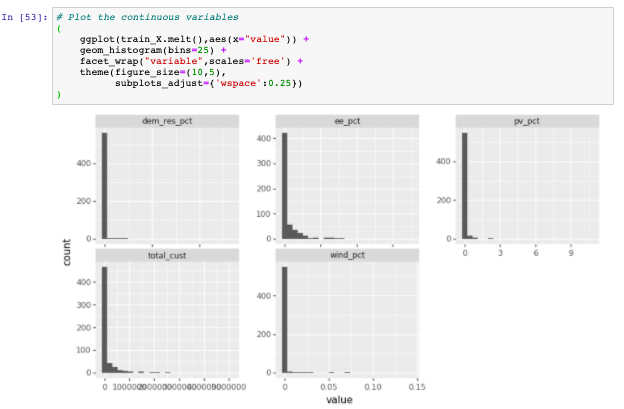

**Attempt 1:** When running the first method through my preliminary pipeline, my mean out-of-sample score was - 21082.6 under my best model, a random forest with a depth of 3 and 1250 estimators. For the second method it was not much better, as my best score was -21120.4. On the test data my MSE was 16057.5 and my r2 score was -0.043. 
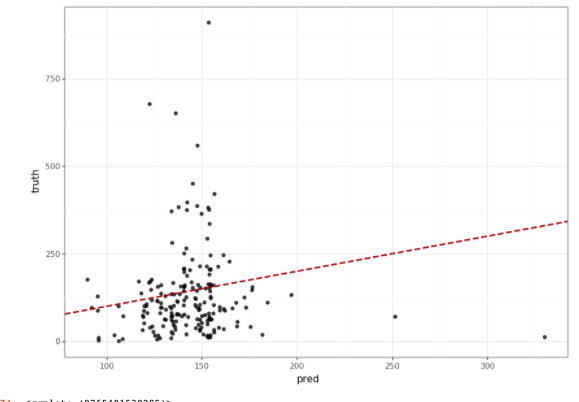

When I used the median method from Attempt 1.5 these were my results. As reference, the standard deviation of my train_y is 146.39. So my mean squared error roughly reflects that, with the lowest RMSE coming out at 141.42.

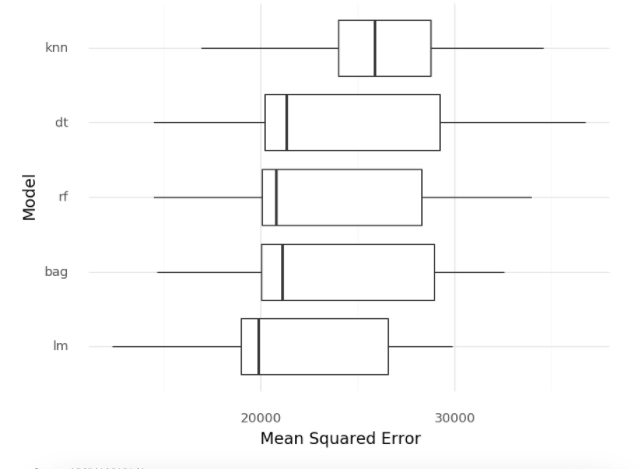

When I ran Attempt 1.5 through my untuned pipeline, I got these results, which were marginally better but not by much.

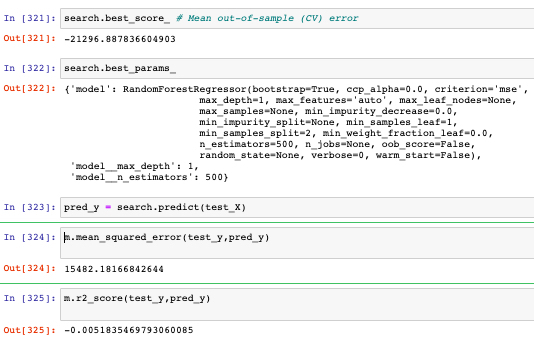

Attempt 2: My first positive R2 value thank god! But the MSE is still pretty bad.
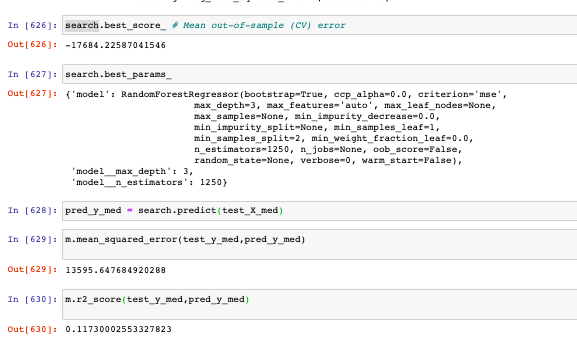

# Works Cited
1. https://www.abb-conversations.com/2019/02/distributed-grid-management-101-ders-are-reshaping-the-power-grid/
2. https://www.vox.com/energy-and-environment/2018/11/30/17868620/renewable-energy-power-grid-architecture